In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image


img = Image.open("inputs/29bb3ece3180_11.jpg")
im = np.array(img)

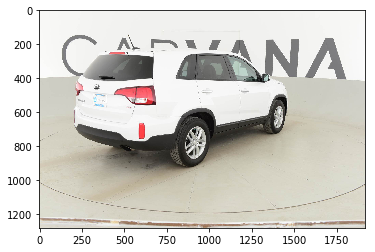

In [3]:
plt.imshow(im)

In [4]:
img.size

(1918, 1280)

In [9]:
np.random.randint?

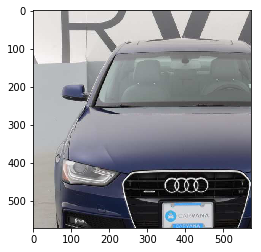

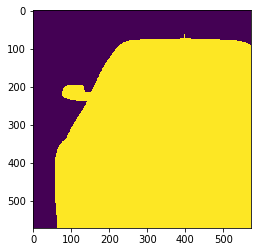

In [64]:
%run utils/img2patch.py

In [66]:
%run utils/build_patch.py

AttributeError: __enter__

In [69]:
file = pd.read_csv('inputs/metadata.csv')
file.head()

,id,year,make,model,trim1,trim2
0,0004d4463b50,2014.0,Acura,TL,TL,w/SE
1,00087a6bd4dc,2014.0,Acura,RLX,RLX,w/Tech
2,000aa097d423,2012.0,Mazda,MAZDA6,MAZDA6,i Sport
3,000f19f6e7d4,2016.0,Chevrolet,Camaro,Camaro,SS
4,00144e887ae9,2015.0,Acura,TLX,TLX,SH-AWD V6 w/Advance Pkg


In [103]:
%run utils/patch_data.py

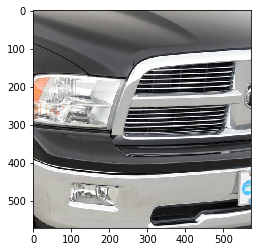

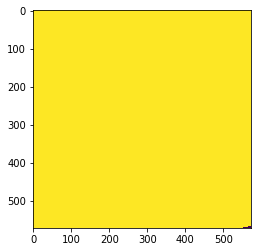

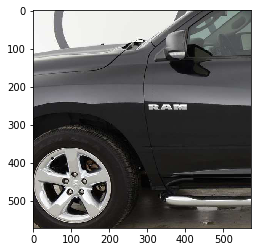

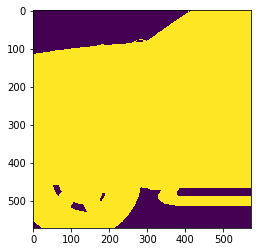

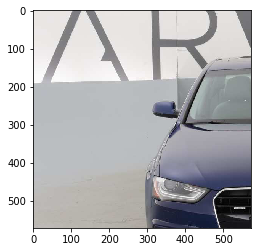

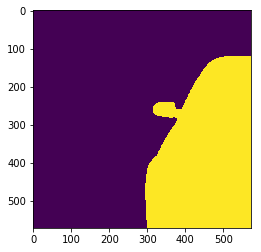

In [105]:
from utils.patch_data import load_data
images, labels = load_data()

for index in range(3):

    plt.imshow(images[index, :, :, :])
    plt.show()
    plt.imshow(labels[index, :, :, 0])
    plt.show()

In [101]:
images.shape

(30, 572, 572, 3)

In [102]:
np.random.permutation?